In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
files = [
    'calib_matched_garman',
    'calib_open_garman',
    'Part1-PCBduroid',
    'Part1-unknown1',
    'Part1-unknown2',
    'Part1-unknown3_1ns',
    'Part1-unknown3_260ps',
    'Part2-board2_280ps',
    'Part2-calib_ch2_Thu'
]

In [3]:
# Read .xlsx files and convert them into .csv
#
for filename in files:
    df = pd.read_excel(f'data/{filename}.xlsx',header=None,nrows=1)
    with open(f'data/csv/{filename}.csv','w+') as f0: f0.write(df.T.to_csv(index=False));

36266

36212

35560

36591

35781

35858

35594

35660

36091

In [4]:
# Read .csv files in lab01/data/csv
#
calib_matched_garman = pd.read_csv('data/csv/calib_matched_garman.csv',header=None).to_numpy()
calib_open_garman = pd.read_csv('data/csv/calib_open_garman.csv',header=None).to_numpy()
Part1_PCBduroid = pd.read_csv('data/csv/Part1-PCBduroid.csv',header=None).to_numpy()
Part1_unknown1 = pd.read_csv('data/csv/Part1-unknown1.csv',header=None).to_numpy()
Part1_unknown2 = pd.read_csv('data/csv/Part1-unknown2.csv',header=None).to_numpy()
Part1_unknown3_1ns = pd.read_csv('data/csv/Part1-unknown3_1ns.csv',header=None).to_numpy()
Part1_unknown3_260ps = pd.read_csv('data/csv/Part1-unknown3_260ps.csv',header=None).to_numpy()
Part2_board2_280ps = pd.read_csv('data/csv/Part2-board2_280ps.csv',header=None).to_numpy()
Part2_calib_ch2_Thu = pd.read_csv('data/csv/Part2-calib_ch2_Thu.csv',header=None).to_numpy()

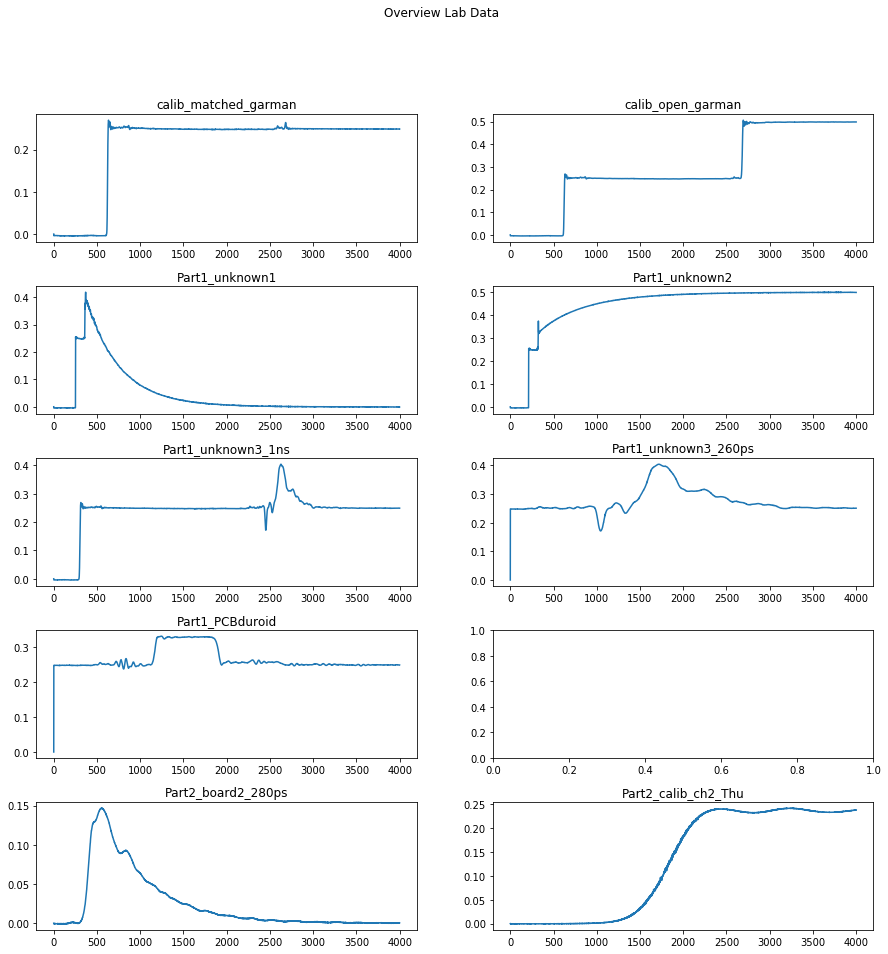

In [5]:
# Plot Overview
#   Number of points: 4000pts
#   Total Time: 200ns
#   Resolution: 0.05 ns/pt
#
fig,axs = plt.subplots(5,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(calib_matched_garman)
axs[0,1].plot(calib_open_garman)
axs[1,0].plot(Part1_unknown1)
axs[1,1].plot(Part1_unknown2)
axs[2,0].plot(Part1_unknown3_1ns)
axs[2,1].plot(Part1_unknown3_260ps)
axs[3,0].plot(Part1_PCBduroid)
axs[4,0].plot(Part2_board2_280ps)
axs[4,1].plot(Part2_calib_ch2_Thu)

axs[0,0].set_title('calib_matched_garman')
axs[0,1].set_title('calib_open_garman')
axs[1,0].set_title('Part1_unknown1')
axs[1,1].set_title('Part1_unknown2')
axs[2,0].set_title('Part1_unknown3_1ns')
axs[2,1].set_title('Part1_unknown3_260ps')
axs[3,0].set_title('Part1_PCBduroid')
axs[4,0].set_title('Part2_board2_280ps')
axs[4,1].set_title('Part2_calib_ch2_Thu')
plt.suptitle('Overview Lab Data');

<hr>

### Constants

- Permittivity of free-space $= \epsilon_0 = 8.854 \times 10^{-12} F/m$
- Permeability of free-space $= \mu_0 = 4\pi \times 10^{-7} H/m$
- Impedance of free-space $= \eta_0 = 120\pi = 376.7\Omega$
- Velocity of light in free-space $= c = 2.998 \times 10^8 m/s$

### Characteristic Impedance of TL

TEM

$\begin{eqnarray}
z_0 &=& \sqrt{\frac{L}{C}} &=& \sqrt{\frac{\mu}{\epsilon}}\\
v   &=& \frac{1}{\sqrt{LC}} &=& \frac{1}{\sqrt{\mu \epsilon}} &=& \frac{c_0}{\sqrt{\epsilon_r}}
\end{eqnarray}$

### Unmatched Transmission Line

- Matched Impedance: Identify the location of the impedance discontinuity and values of the characteristic impedance. From the measured time delay, estimate the dielectric constant and characteristic impedance of each TL section of the board. 
- Open: Estimate $\Gamma$ and $Z_L$ of the open circuit.

<hr>

### Unknown Loads

- Measure three unknown loads: Using the analytical model, estimate the characteristics (capacitive, resistive, inductive) values of these loads. See the expected responses and the time-domain responses of complex loads.

##### Calibration Part1

Incident voltage: $V^+ = 0.25V$

$\begin{align}
&\Gamma_{short}  &=&-1  & V^- &= -0.25V \\
&\Gamma_{open}   &=& 1  & V^- &= 0V \\
&\Gamma_{match}  &=& 0  & V^- &= 0.25V
\end{align}$

$\begin{align}
\Gamma_L &= \frac{V^-}{V^+} = \frac{Z_L-Z_0}{Z_L+Z_0} 
\end{align}$

$\Gamma_L = 0$ for load $Z_L = 50 \Omega$, thus $Z_0 = 50 \Omega$.

$\tau$ is time to reach $63.2\%$ of its final value in an increasing system and $36.8\%$ is a decreasing system.

<hr>

##### Part1_unknown1

![](images/shuntR_L.png)

In [6]:
V0 = max(Part1_unknown1)[0]
res = 0.05 # resolution = 0.05ns
x0 = np.argmax(Part1_unknown1)
# Tau = 36.8% * V0 = 0.1538
x1 = np.where((Part1_unknown1>0.153) & (Part1_unknown1<0.154))[0][0]

print(f'Initial Voltage = {round(V0,4)}V at t = 0')
print(f'Time Constant Response Value = {round(V0*0.368,4)}V at \
t = {round((x1-x0)*res,4)}ns')

Initial Voltage = 0.4179V at t = 0
Time Constant Response Value = 0.1538V at t = 18.5ns


Known:

$\begin{align}
Z_0  &= 50 \\
Ei   &= 0.25 \\
V_0  &= 0.4179 \\
\tau &= 18.5 ns
\end{align}$

Solve: 

$\begin{align}
0.4179 &= E_i + E_i\frac{R-Z_0}{R+Z_0} & \rightarrow R &= 254.46 \Omega \\
\tau   &= \frac{R+Z_0}{RZ_0}L & \rightarrow L &= 773 nH
\end{align}$

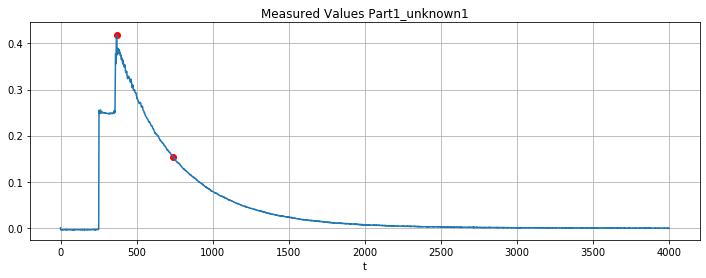

In [7]:
# Measured Values: Part1_unknown1
#
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(Part1_unknown1)
ax.scatter(x0,Part1_unknown1[x0],color='red')
ax.scatter(x1,Part1_unknown1[x1],color='red')
ax.set_title('Measured Values Part1_unknown1')
ax.set_xlabel('t')
plt.grid(True);

In [8]:
# Calculated Values
#
R = 254.46           # 220 ohms
L = 773 *10**(-9)    # 786 nH
Z0 = 50
Ei = 0.25
t,width = np.linspace(-0.0000001,0.0000001,4000,endpoint=False,retstep=True)
print(f'resolution = {width}s')
# range:[-100ns,100ns] with resolution 0.05ns

resolution = 4.9999999999999995e-11s


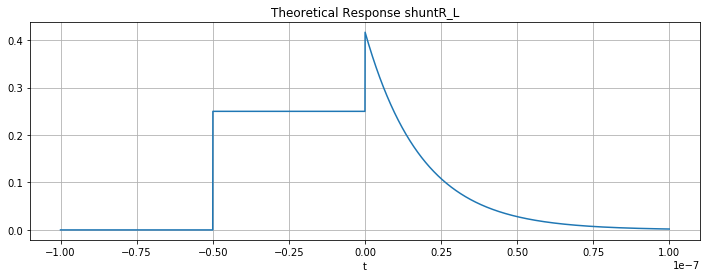

In [9]:
# Theoretical response
#
def shuntR_L(R,L,Z0,Ei,t):
    Tao = L*(Z0+R)/(Z0*R)
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*((1+const)*np.exp(-x/Tao))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

fig,ax = plt.subplots(figsize=(12,4))
ax.plot(t,shuntR_L(R,L,Z0,Ei,t))
ax.set_title('Theoretical Response shuntR_L')
ax.set_xlabel('t')
plt.grid(True);

<hr>

##### Part1_unknown2

![](images/seriesR_C.png)

In [10]:
res = 0.05 # resolution = 0.05ns
x0 = 330
# Tau = V0 + 63.2% * (2Ei-V0) = 0.4349
x1 = np.where((Part1_unknown2>0.43) & (Part1_unknown2<0.44))[0][0]

print(f'Initial Voltage = {round(Part1_unknown2[x0][0],4)}V at t = 0')
print(f'Time Constant Response Value = {round(.3231+(0.5-.3231)*.632,4)}V at \
t = {round((x1-x0)*res,4)}ns')

Initial Voltage = 0.3232V at t = 0
Time Constant Response Value = 0.4349V at t = 24.5ns


Known:

$\begin{align}
Z_0  &= 50 \\
Ei   &= 0.25 \\
V_0  &= 0.3231 \\
\tau &= 24.5ns
\end{align}$

Solve: 

$\begin{align}
0.3231 &= E_i + E_i\frac{R-Z_0}{R+Z_0} & \rightarrow R &= 91.39 \Omega \\
\tau   &= (R+Z_0)C & \rightarrow C &= 0.163 nF
\end{align}$

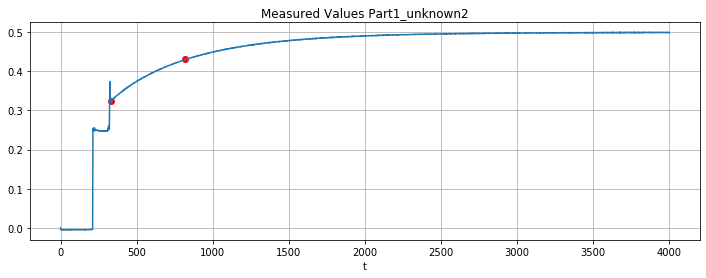

In [11]:
# Measured Values: Part1_unknown2
#
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(Part1_unknown2)
ax.scatter(x0,Part1_unknown2[x0],color='red')
ax.scatter(x1,Part1_unknown2[x1],color='red')
ax.set_title('Measured Values Part1_unknown2')
ax.set_xlabel('t')
plt.grid(True);

In [12]:
# Calculated Values
#
R = 91.39           # 100 Ohms
C = 0.163 *10**(-9) # 0.184 nF
Z0 = 50
Ei = 0.25
t = np.linspace(-0.0000001,0.0000001,20000) # range:[-100ns,100ns] with resolution 0.01ns 

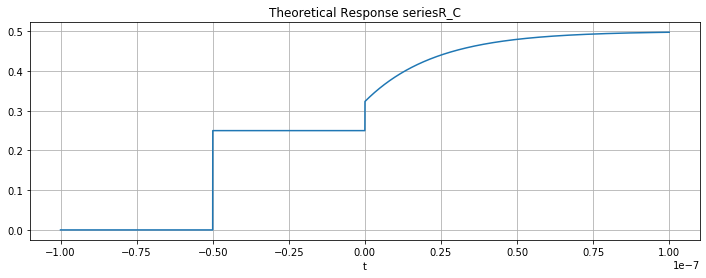

In [13]:
# Theoretical Response Part1_unknown2
#
def seriesR_C(R,C,Z0,Ei,t):
    Tao = (R+Z0)*C
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*(2-(1-const)*np.exp(-x/Tao))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

fig,ax = plt.subplots(figsize=(12,4))
ax.plot(t,seriesR_C(R,C,Z0,Ei,t))
ax.set_title('Theoretical Response seriesR_C')
ax.set_xlabel('t')
plt.grid(True);

<hr>

##### Part1_unknown3

![](images/seriesR_L.png)

In [70]:
x0 = np.argmax(Part1_unknown3_1ns)
print(f'Initial Voltage = {round(Part1_unknown3_1ns[x0][0],4)}V at t = 0')

Initial Voltage = 0.4044V at t = 0


Known:

$\begin{align}
Z_0  &= 50 \\
Ei   &= 0.25 \\
V_0  &= 0.4044 \\
\tau &= ?
\end{align}$

Solve: 

$\begin{align}
E_i &= (1+\frac{R-Z_0}{R+Z_0})E_i & \rightarrow R &= 50 \Omega \\
\end{align}$

Noisy decay so find integration to get L.

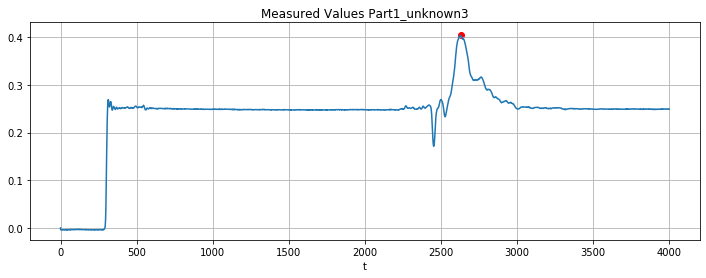

In [71]:
# Measured Values: Part1_unknown3
#
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(Part1_unknown3_1ns)
ax.scatter(x0,Part1_unknown3_1ns[x0],color='red')
ax.set_title('Measured Values Part1_unknown3')
ax.set_xlabel('t')
plt.grid(True);

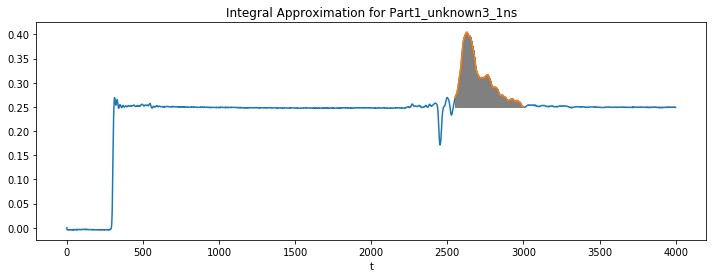

In [84]:
# Define range and function
a = 2550
b = 3000
n = b-a
f = Part1_unknown3_1ns

dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)

# plot
fig,ax = plt.subplots(figsize=(12,4))
for dx in dxs:
    dx = int(dx)
    midpoint = (f[dx]+f[dx+1])/2-0.25
    rect = pch.Rectangle((dx,0.25),width,midpoint[0],facecolor='#D3D3D3',edgecolor='grey')
    ax.add_artist(rect)
ax.plot(f)
ax.plot(dxs,f[a:b])

# labels
plt.xlabel('t')
plt.title('Integral Approximation for Part1_unknown3_1ns');

In [106]:
# Integral Approximation to Calculate Inductance
#
def approx(f,a,b,n):
    '''
    Returns the integral approximation of f(x)dx from a to b
    f : continuous waveform
    a : starting point
    b : ending point
    '''
    apprx = 0
    dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)
    for dx in dxs:
        dx = int(dx)
        midpoint = (f[dx]+f[dx+1])/2-0.25 # Use the midpoint approximation
        apprx += width*midpoint # width is 1 nanosecond
    return apprx[0]*10**(-9)

a = 2550
b = 2950
n = b-a
f = Part1_unknown3_1ns
print(f'L approximation is {approx(f,a,b,n)} H')

L approximation is 2.4925674500000008e-08 H


In [111]:
# Calculated Values
#
R = 50              # R = 50 Ohms
L = 24.9 *10**(-9)  # L = 29 nH
Ei = 0.25
Z0 = 50 
t = np.linspace(-0.0000001,0.0000001,4000)

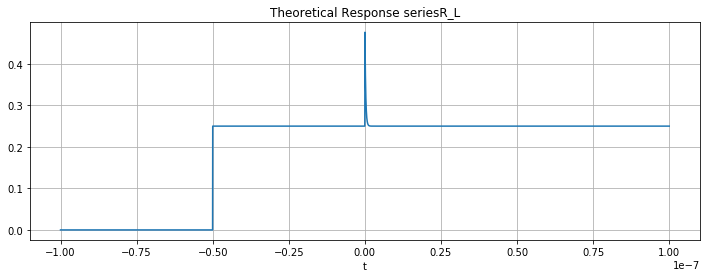

In [115]:
# Theoretical Response Part1_unknown3
#
def seriesR_L(R,L,Z0,Ei,t):
    Tao = L/(R+Z0)
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*((1+const)+(1-const)*np.exp(-x/Tao))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

fig,ax = plt.subplots(figsize=(12,4))
ax.plot(t,seriesR_L(R,L,Z0,Ei,t))
ax.set_title('Theoretical Response seriesR_L')
ax.set_xlabel('t')
plt.grid(True);

<hr>

### Extra: Shunt R_C

![](images/shuntR_C.png)

In [72]:
def shuntR_C(R,C,Z0,Ei,t):
    Tao = C*(Z0*R)/(Z0+R)
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*((1+const)*(1-np.exp(-x/Tao)))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

#fig,ax = plt.subplots(figsize=(12,4))
#ax.plot(t,shuntR_C(R,C,Z0,Ei,t))
#ax.set_title('shuntR_C')
#ax.set_xlabel('t');